In [17]:
import cv2
import time

In [18]:
import matplotlib.pyplot as plt

In [19]:
from PIL import Image
import numpy as np

In [20]:
import random
import math

prime = set()
enq={}
deq={}
public_key = None
private_key = None
n = None

def primefiller():
    sieve = [True] * 10000
    sieve[0] = False
    sieve[1] = False
    for i in range(2, 10000):
        for j in range(i * 2, 10000, i):
            sieve[j] = False
    for i in range(len(sieve)):
        if sieve[i]:
            prime.add(i)


def pickrandomprime():
    global prime
    k = random.randint(0, len(prime) - 1)
    it = iter(prime)
    for _ in range(k):
        next(it)
    ret = next(it)
    prime.remove(ret)
    return ret


def setkeys():
    global public_key, private_key, n, prime1, prime2, fi, e, d
    prime2 = pickrandomprime()
    prime1 = pickrandomprime()
    n = prime1 * prime2
    fi = (prime1 - 1) * (prime2 - 1)
    e = 2
    while True:
        if math.gcd(e, fi) == 1:
            break
        e += 1
    public_key = e
    d = 2
    while True:
        if (d * e) % fi == 1:
            break
        d += 1
    private_key = d

def encrypt(message):
    global public_key, n
    encrypted_text = pow(message, public_key, n)
    return encrypted_text

def decrypt(encrypted_text):
    global private_key, n
    decrypted = pow(encrypted_text, private_key, n)
    return decrypted

def encoder(message):
    if message in enq.keys():
        return(enq[message])
    else:
        eq = encrypt(message)
        enq[message] = eq
        return eq
    

def decoder(num):
    if num in deq.keys():
        return deq[num]
    else:
        q = (decrypt(num))
        deq[num]=q
        return q

In [21]:
primefiller()
setkeys()

In [22]:
from PIL import Image

def encrypt_image(image_path):
    img = Image.open(image_path)
    width, height = img.size
    doubled_width = width * 2
    doubled_height = height * 2
    new_img = Image.new("RGB", (doubled_width, doubled_height))

    for y in range(height):
        for x in range(width):
            r, g, b = img.getpixel((x, y))
            encrypted_r = encoder(r)
            encrypted_g = encoder(g)
            encrypted_b = encoder(b)
              
            # Splitting the encrypted values into four parts
            product2_r = encrypted_r // (255 ** 3)
            remainder3_r = (encrypted_r // (255 ** 2)) % 255
            remainder2_r = (encrypted_r // 255) % 255
            remainder1_r = encrypted_r % 255
            
            product2_g = encrypted_g // (255 ** 3)
            remainder3_g = (encrypted_g // (255 ** 2)) % 255
            remainder2_g = (encrypted_g // 255) % 255
            remainder1_g = encrypted_g % 255
            
            product2_b = encrypted_b // (255 ** 3)
            remainder3_b = (encrypted_b // (255 ** 2)) % 255
            remainder2_b = (encrypted_b // 255) % 255
            remainder1_b = encrypted_b % 255
                           
            # Storing the split encrypted values in 4 pixels
            new_img.putpixel((2*x, 2*y), (product2_r, product2_g, product2_b))
            new_img.putpixel((2*x + 1, 2*y), (remainder1_r, remainder1_g, remainder1_b))
            new_img.putpixel((2*x, 2*y + 1), (remainder2_r, remainder2_g, remainder2_b))
            new_img.putpixel((2*x + 1, 2*y + 1), (remainder3_r, remainder3_g, remainder3_b))
    
    new_img.show()
    new_img.save('cipher.png')  # Save the image using PIL's save method



In [23]:
import cv2
import cupy as cp
import matplotlib.pyplot as plt

# Function to perform Arnold's Cat Map transformation
def arnold_cat_map(image):
    h, w, _ = image.shape
    x, y = cp.meshgrid(cp.arange(w), cp.arange(h))
    new_x = (2 * x + y) % w
    new_y = (x + y) % h
    out_image = image[new_y, new_x]
    return out_image


Number of iterations required to get original: 384


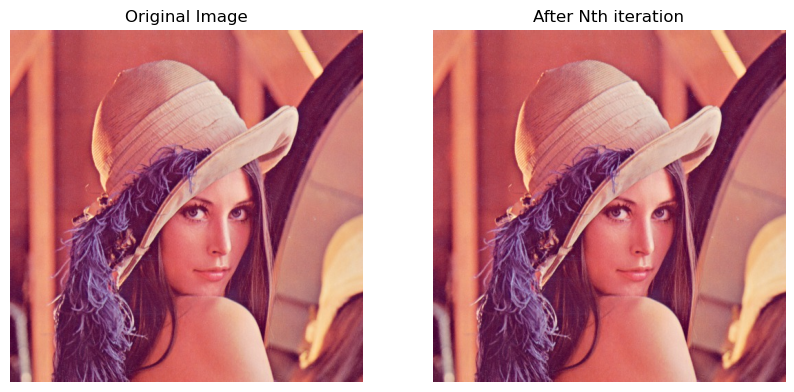

In [24]:
import cupy as cp
original_image = cv2.imread('lena.png')
original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

original_image = cp.asarray(original_image)
current_image = cp.copy(original_image)
iteration = 0
while True:
    current_image = arnold_cat_map(current_image)
    iteration += 1
    if cp.all(current_image == original_image):
        print(f'Number of iterations required to get original: {iteration}')
        break

original_image = cp.asnumpy(original_image)
current_image = cp.asnumpy(current_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(original_image)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(current_image)
plt.title('After Nth iteration')
plt.axis('off')

plt.show()

In [25]:
def arnold_cat_map(img, n_iter):
    if img.ndim < 2:
        raise ValueError("Input image must have at least 2 dimensions")
    img = np.array(img)
    h, w = img.shape[:2]

    x, y = np.meshgrid(np.arange(w), np.arange(h))

    for _ in range(n_iter):
        x_new = (x + y) % w
        y_new = (x + 2 * y) % h
        x, y = x_new, y_new
    img_transformed = img[y.astype(int), x.astype(int)]
    return img_transformed

Encryption time: 0.04 seconds


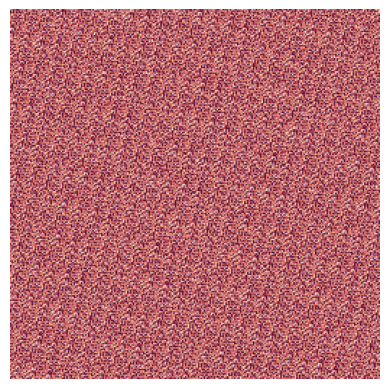

In [26]:
# Load the image
img = cv2.imread('lena 256.png')

# Encrypt the image
n_iter = d%iteration
e3 = time.time()
encrypted_img = arnold_cat_map(img, n_iter)
d3 = time.time()
print(f'Encryption time: {d3 - e3:.2f} seconds')
cv2.imwrite('shuffled.png', encrypted_img.astype(np.uint8))

# Display the encrypted image using Matplotlib
plt.imshow(cv2.cvtColor(encrypted_img, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.show()


In [27]:
image_path ="shuffled.png"  # image path
s1=time.time()
encrypt_image(image_path)
e1=time.time()

In [28]:
def decrypt_image(image_path):
    encrypted_img = Image.open(image_path)
    width, height = encrypted_img.size
    original_width = width // 2
    original_height = height // 2
    decrypted_img = Image.new("RGB", (original_width, original_height))

    for y in range(original_height):
        for x in range(original_width):
            # Extracting split encrypted values from 4 pixels
            product2_r, product2_g, product2_b = encrypted_img.getpixel((2*x, 2*y))
            remainder1_r, remainder1_g, remainder1_b = encrypted_img.getpixel((2*x + 1, 2*y))
            remainder2_r, remainder2_g, remainder2_b = encrypted_img.getpixel((2*x, 2*y + 1))
            remainder3_r, remainder3_g, remainder3_b = encrypted_img.getpixel((2*x + 1, 2*y + 1))
            
            # Combining split encrypted values to reconstruct encrypted RGB components
            encrypted_r = product2_r * (255 ** 3) + remainder3_r * (255 ** 2) + remainder2_r * 255 + remainder1_r
            encrypted_g = product2_g * (255 ** 3) + remainder3_g * (255 ** 2) + remainder2_g * 255 + remainder1_g
            encrypted_b = product2_b * (255 ** 3) + remainder3_b * (255 ** 2) + remainder2_b * 255 + remainder1_b
            
            # Decrypting each encrypted RGB component
            decrypted_r = decoder(encrypted_r)
            decrypted_g = decoder(encrypted_g)
            decrypted_b = decoder(encrypted_b)
    
            # Storing the decrypted values in the decrypted image
            decrypted_img.putpixel((x, y), (decrypted_r, decrypted_g, decrypted_b))

    decrypted_img.show()
    decrypted_img.save("decrypt1.png")


In [29]:
s2=time.time()
decrypt_image("cipher.png")
e2=time.time()

Decryption time: 0.10 seconds


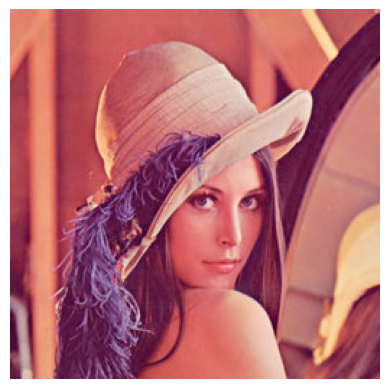

In [30]:
img = cv2.imread("decrypt1.png")

# Encrypt the image
n_iter = iteration-d%iteration
e4 = time.time()
decrypted_img = arnold_cat_map(img, n_iter)
d4 = time.time()
print(f'Decryption time: {d4 - e4:.2f} seconds')
cv2.imwrite('decrypt2.png', decrypted_img.astype(np.uint8))

plt.imshow(cv2.cvtColor(decrypted_img, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Hide axes
plt.show()

In [31]:
print("p1",prime1)
print("p2",prime2)
print("e",public_key)
print("d",private_key)

p1 3089
p2 1151
e 3
d 2367467


In [32]:
print("Encryption using RSA ",e1-s1)
print("Decryption using RSA", e2-s2)
print("Shuffling using CATMAP", d3-e3)
print("Shuffling using CATMAP",d4-e4)

Encryption using RSA  13.779371500015259
Decryption using RSA 3.8215229511260986
Shuffling using CATMAP 0.03623223304748535
Shuffling using CATMAP 0.09882283210754395
